In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('data/train.txt', sep='\t')
df_test = pd.read_csv('data/test.txt', sep='\t')

### 查看简单数据

In [3]:
df_train.head()


,label,content
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [4]:
len(df_train)

126476

### 查看第一条内容的长度和数据类型

In [5]:
len(df_train['content'][0]), type(df_train['content'][0])

(746, str)

### 编写统计字符的函数

In [6]:
#  total函数用于统计content的字数

def total_train(data_len):
    num_train = []
    for i in range(data_len):
        j = len(df_train['content'][i])       
        num_train.append(j)        
    return num_train
    
def total_test(data_len):
    num_test = []
    for i in range(data_len):
        j = len(df_test['content'][i])
        num_test.append(j)          
    return num_test
    
    

In [7]:
# 求测试集的每个内容长度
total_trains = total_train(len(df_train))

In [8]:
# 求测试集的每个内容长度
total_tests = total_test(len(df_test))


### 使用describe函数查看训练集和测试集中的数据长度分布

In [9]:
pd.Series(total_trains).describe()


count    126476.000000
mean        921.445223
std         905.348210
min           8.000000
25%         407.000000
50%         699.000000
75%        1144.000000
max       50593.000000
dtype: float64

In [10]:
pd.Series(total_tests).describe()

count    19904.000000
mean       890.293258
std        823.888594
min          8.000000
25%        421.000000
50%        660.000000
75%       1082.000000
max      16088.000000
dtype: float64

### 直方图

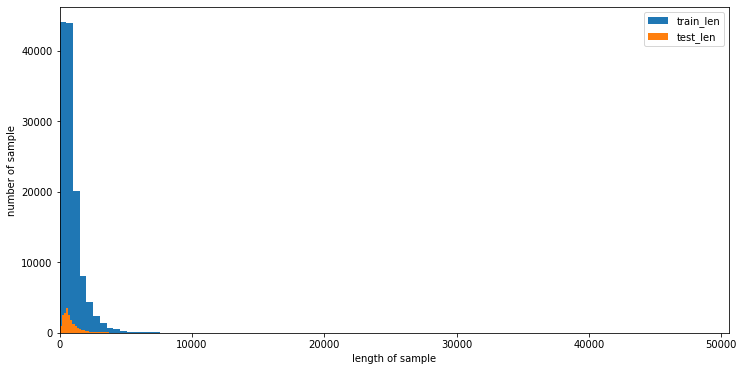

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax = plt.hist(x=total_trains, bins=100)
ax = plt.hist(x=total_tests, bins=100)

plt.xlim([0, max(max(total_trains), max(total_tests))])
plt.xlabel("length of sample")
plt.ylabel("number of sample")
plt.legend(['train_len','test_len'])

plt.show()

使用seaborn绘制更好的图。seaborn计算的纵坐标是频率，而不是出现次数。由于训练集和测试集的数据量不一样，因此用频率更加科学、更能看出是否符合同一分布。

D:\Anaconda3\envs\PyTorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\envs\PyTorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


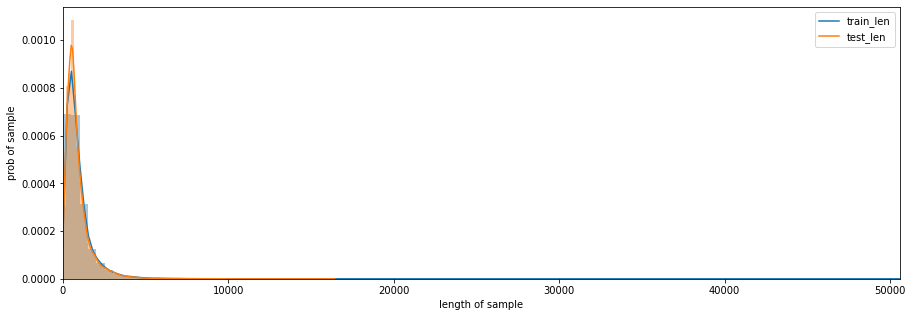

In [12]:
import seaborn as sns
plt.figure(figsize=(15,5))
ax = sns.distplot(total_trains, bins=100)
ax = sns.distplot(total_tests, bins=100)
plt.xlim([0, max(max(total_trains), max(total_tests))])
plt.xlabel("length of sample")
plt.ylabel("prob of sample")
plt.legend(['train_len','test_len'])

### 同分布验证

In [13]:
import scipy
scipy.stats.ks_2samp(total_trains, total_tests)

KstestResult(statistic=0.03764180530571537, pvalue=1.312219233956745e-21)

P值为0.425，比指定的显著水平（假设为5%）小，我们我们暂时认为二者同分布

### 截断长度

#### 验证是否为正态分布

D:\Anaconda3\envs\PyTorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\envs\PyTorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


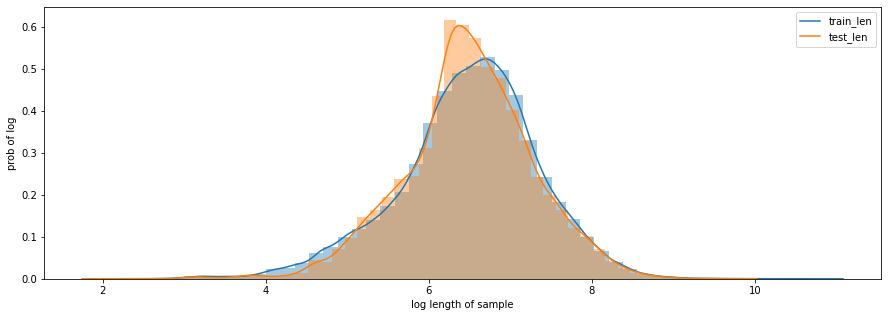

In [14]:
log_len_dist = np.log(total_trains)
log_len_test_dist = np.log(total_tests)
plt.figure(figsize=(15,5))
ax = sns.distplot(log_len_dist)
ax = sns.distplot(log_len_test_dist)
plt.xlabel("log length of sample")
plt.ylabel("prob of log")
plt.legend(['train_len','test_len'])

In [15]:
_, lognormal_ks_pvalue = scipy.stats.kstest(rvs=log_len_dist, cdf='norm')
lognormal_ks_pvalue

0.0

？0？？？拟合优度检验，p值为0，意思就是说这不是一个正态分布。

从log图上可以看出，数据分布的长度大多低于exp（8），所以截断长度设为3000.

In [16]:
np.exp(8)

2980.9579870417283

### 类别分布

In [17]:
def total_class():
    num_dict =[]
    for i in range(len(df_train)):
        num_dict.append(df_train['label'][i])
    return num_dict  



In [18]:
total_classes = total_class()

In [19]:
from collections import Counter
count = Counter(total_classes)
print(count)

Counter({'体育': 15000, '娱乐': 15000, '房产': 15000, '教育': 15000, '游戏': 15000, '科技': 15000, '财经': 15000, '其他': 12991, '军事': 6080, '汽车': 2405})


In [20]:
type(count)

collections.Counter

In [21]:
cc = {k:v for k,v in count.items()}
cc

{'体育': 15000,
 '娱乐': 15000,
 '房产': 15000,
 '教育': 15000,
 '游戏': 15000,
 '科技': 15000,
 '财经': 15000,
 '其他': 12991,
 '军事': 6080,
 '汽车': 2405}

In [22]:
key = cc.keys()
values = cc.values()
key
values

dict_values([15000, 15000, 15000, 15000, 15000, 15000, 15000, 12991, 6080, 2405])

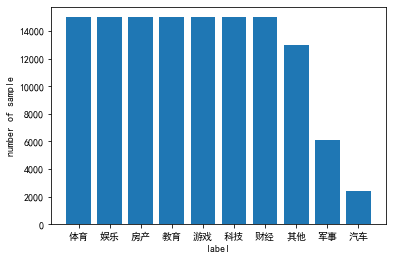

In [23]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(key,values)
plt.xlabel("label")
plt.ylabel("number of sample")
plt.show()

### 类别长度

([<matplotlib.axis.XTick at 0x26742350da0>,
 [Text(0, 0, '15000'),
  Text(1, 0, '15000'),
  Text(2, 0, '15000'),
  Text(3, 0, '15000'),
  Text(4, 0, '15000'),
  Text(5, 0, '15000'),
  Text(6, 0, '15000'),
  Text(7, 0, '12991'),
  Text(8, 0, '6080'),
  Text(9, 0, '2405')])

<Figure size 432x288 with 0 Axes>

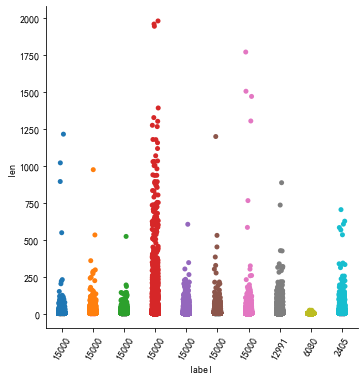

In [24]:
df_train['len'] = df_train['content'].apply(lambda x: len(x.split()))
plt.figure()
ax = sns.catplot(x='label', y='len', data=df_train, kind='strip')
plt.xticks(range(10), list(cc.values()),  rotation=60)